In [153]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

In [154]:
FILE_PATH = "optuna_out.txt"

In [155]:
pattern = r"Trial\s([0-9]+)\sfinished\swith\svalue:\s([0-9]+\.?[0-9]*)\sand\sparameters:\s{(.+)}"


In [156]:
file = open(FILE_PATH)

def param_parser(parameters: str) -> dict:
    param_list = parameters.split(",")
    param_dict = dict()
    for p in param_list:
        result = re.match(r"\s*'(.+)':\s(.+)", p)
        name = result.group(1)
        value = result.group(2)
        try:
            value = int(value)
        except:
            try:
                value = float(value)
            except:
                pass
        # print(name, value, type(value))
        param_dict[name] = value
    return param_dict

lines = file.readlines()

trials = []

for line in lines:
    result = re.search(pattern, line)
    if result is None:
        continue
    trial = int(result.group(1))
    error = float(result.group(2))
    params = param_parser(result.group(3))
    trial_info = pd.Series(params)
    trial_info['trial'] = trial
    trial_info['error'] = error
    trials.append(trial_info)

df = pd.concat(trials, axis=1)
df = df.T
    
# df = df.drop('grow_policy', axis=1)

# df = df.sort_values("error")

df = df.infer_objects()

df

,gamma,max_depth,subsample,n_estimators,min_child_weight,colsample_bytree,learning_rate,grow_policy,reg_alpha,reg_lambda,trial,error
0,0.475097,6,0.741164,461,25,0.168625,0.071099,'depthwise',0.001397,0.027866,0,2.451272
1,0.323997,15,0.566533,3343,2,0.652783,0.007207,'depthwise',5.936114,0.000842,1,2.197730
2,0.732368,4,0.906755,521,25,0.808231,0.018519,'depthwise',0.000215,0.000274,2,2.131934
3,0.014750,9,0.822952,3283,22,0.622163,0.015462,'lossguide',6.587675,0.002908,3,2.264616
4,0.965986,14,0.913639,2578,6,0.137047,0.001996,'depthwise',3.327074,0.005105,4,2.530657
...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.795155,12,0.086851,1666,10,0.725934,0.007892,'depthwise',4.317126,0.313864,195,2.120335
196,0.761095,13,0.070145,1569,11,0.747720,0.007174,'depthwise',3.302082,0.346297,196,2.130126
197,0.805415,12,0.097836,1688,9,0.724428,0.006314,'depthwise',2.310683,0.140017,197,2.118212
198,0.797536,13,0.097866,2094,9,0.727898,0.006330,'depthwise',2.213019,0.146872,198,2.123384


In [157]:
df_copy = df.select_dtypes(include= np.number)

id_vars = "error"
value_vars = df_copy.columns.drop(id_vars)

df_melted = df_copy.melt(id_vars, value_vars)

df_melted

,error,variable,value
0,2.451272,gamma,0.475097
1,2.197730,gamma,0.323997
2,2.131934,gamma,0.732368
3,2.264616,gamma,0.014750
4,2.530657,gamma,0.965986
...,...,...,...
1995,2.120335,trial,195.000000
1996,2.130126,trial,196.000000
1997,2.118212,trial,197.000000
1998,2.123384,trial,198.000000


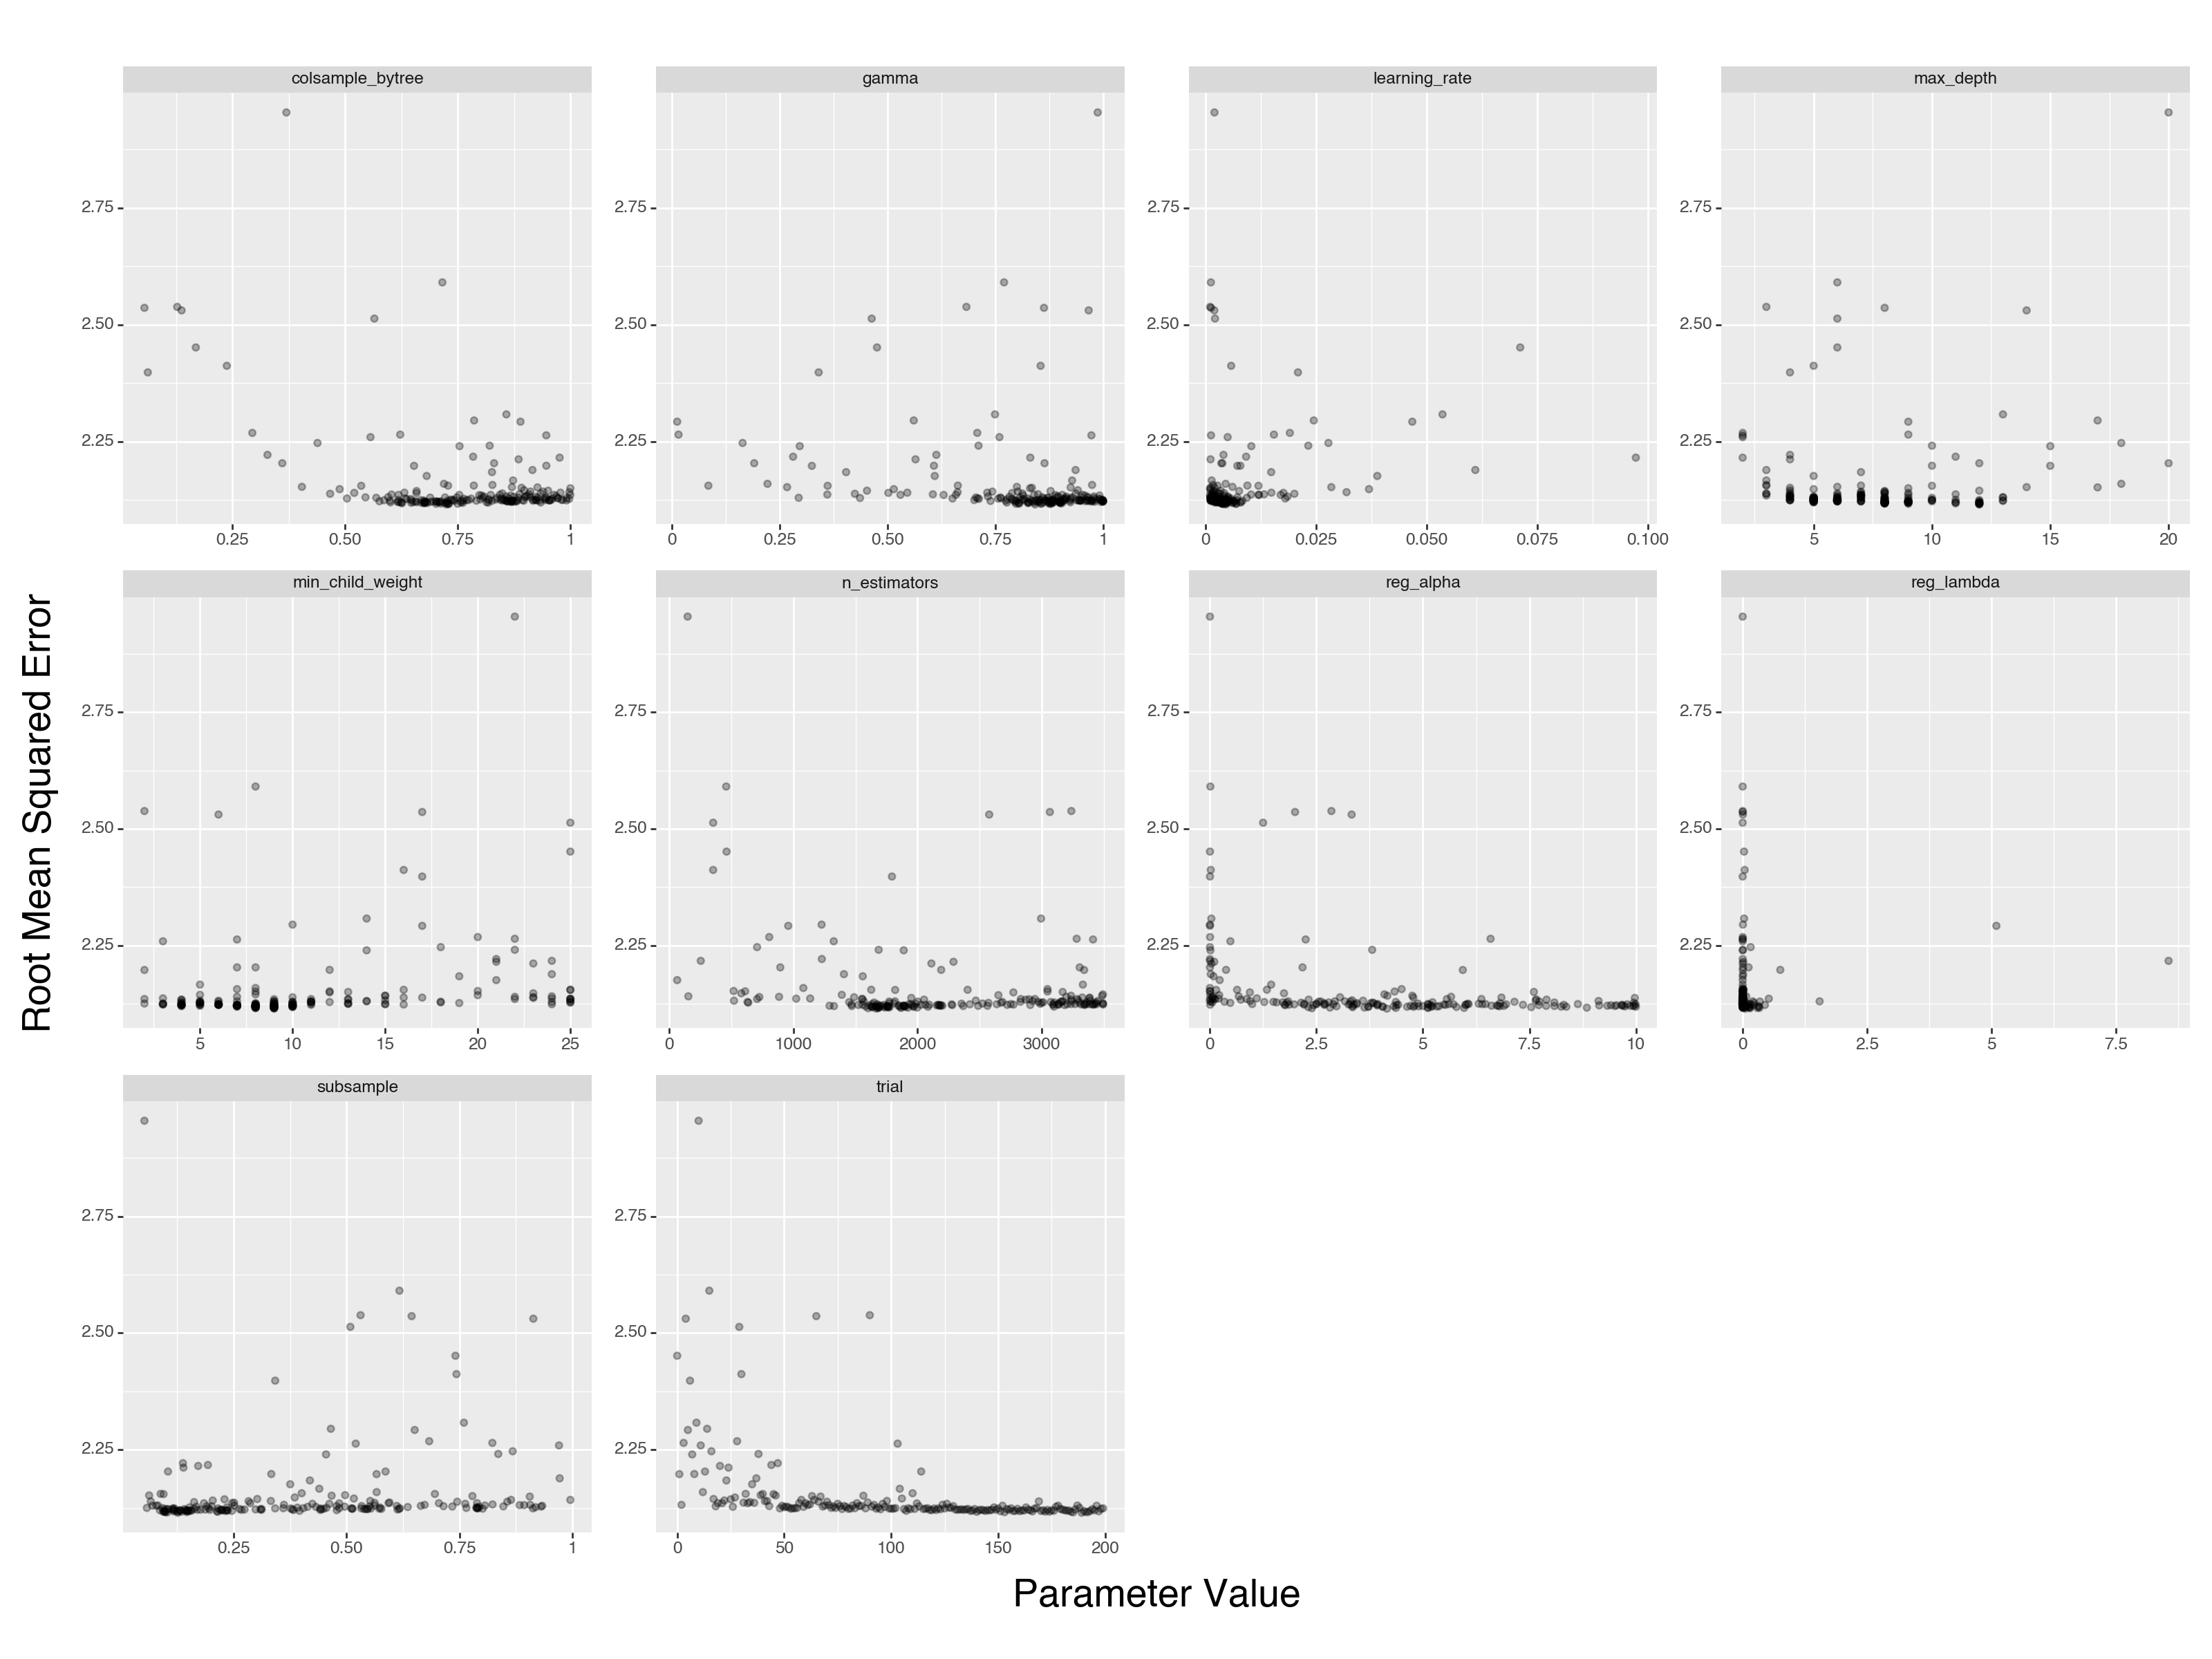

<Figure Size: (1600 x 1200)>

In [173]:
plot_width = 4
plot_height = 4
facet_cols = 4

(
    ggplot(df_melted, aes("value", "error"))
    + geom_point(alpha=0.3, color='black')
    + facet_wrap(facets="variable", scales="free", shrink=False, ncol=facet_cols)
    + theme(figure_size=(plot_width * facet_cols, plot_height * np.ceil(len(value_vars) / facet_cols)),
            axis_title=element_text(size=20))
    + labs(x="Parameter Value", y="Root Mean Squared Error")
)

In [159]:
# sns.kdeplot(x=df['gamma'], y=df['error'])

# plt.show()